In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement

In [11]:
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)
for row in session.query(Measurement, Measurement.prcp).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000001B132C367C0>, 0.08)
(<sqlalchemy.ext.automap.measurement object at 0x000001B132C36370>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x000001B132C36820>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x000001B132C36970>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x000001B132C36430>, None)


# Exploratory Climate Analysis

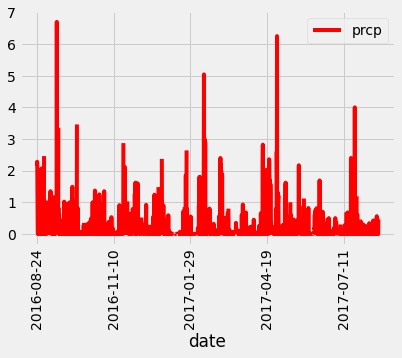

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
###Date is one year before 2017-08-23. Found in TablePlus
# Perform a query to retrieve the data and precipitation scores
year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >'2016-08-23').all()
# Save the query results as a Pandas DataFrame and set the index to the date column
year_df = pd.DataFrame(year)
#year_df.head()
# Sort the dataframe by date
year_df.sort_values(by=['date'], inplace = True)
year_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
year_df.plot(x = 'date', y = 'prcp', rot=90, color="r")
plt.xlabel = 'Date'
plt.ylabel = 'Inches'

In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_df['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [49]:
# Design a query to show how many stations are available in this dataset?
#station_number = session.query(Station.id).count(Measurement.date).all()
station_number = session.query(Station.id).count()
print(f'The number of stations is {station_number}')

The number of stations is 9


In [54]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activity_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
print(f'The most to least active stations are represented as such {activity_stations}')

The most to least active stations are represented as such [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [64]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_year = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs),
    Measurement.station
).filter(Measurement.station =='USC00519281').all()
print(f'The lowest temperature was {temp_year[0][0]}, the highest temperature was {temp_year[0][1]} and the average temperature was {temp_year[0][2]}')

The lowest temperature was 54.0, the highest temperature was 85.0 and the average temperature was 71.66378066378067


54.0

Text(0, 0.5, 'Temperature')

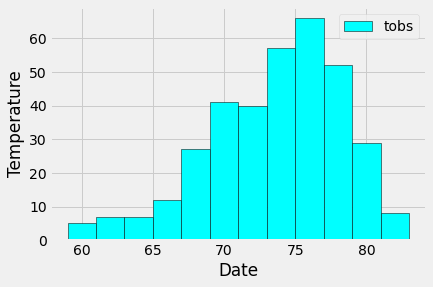

In [81]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_histo = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-08-23').filter(Measurement.station == 'USC00519281').all()
#print(temp_histo)
temp_histo_df = pd.DataFrame(temp_histo)
ax = temp_histo_df.plot.hist(bins = 12, color="cyan", edgecolor= 'black')
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
